<a href="https://colab.research.google.com/github/JCSR2022/RedNeuronalConvolucional_ClasificadorPerros/blob/main/RedNeuronalConvolucional_ClasificadorPerros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto basado en curso Pianalytix. Modulo 02.


## Predicción de raza de perro

En este proyecto, veremos cómo usar Keras y TensorFlow para construir, entrenar y probar una red neuronal convolucional capaz de identificar la raza de un perro en una imagen suministrada. Este es un problema de aprendizaje supervisado, específicamente un problema de clasificación multiclase.


Una red neuronal convolucional (CNN, por sus siglas en inglés) es un tipo de arquitectura de redes neuronales profundas diseñada para procesar y analizar datos que tienen una estructura de cuadrícula, como imágenes o secuencias de datos temporales. Las CNN se han vuelto muy populares en el campo del aprendizaje automático y la visión por computadora debido a su capacidad para extraer automáticamente características relevantes de los datos y realizar tareas de clasificación y reconocimiento visual de alto nivel.

La estructura principal de una CNN está compuesta por capas convolucionales, capas de pooling (submuestreo) y capas completamente conectadas. Las capas convolucionales son responsables de aplicar filtros a los datos de entrada para detectar características locales, como bordes, texturas o patrones específicos. Estas capas utilizan la operación de convolución, que aplica una ventana deslizante sobre la entrada y realiza una multiplicación punto a punto entre los valores de la ventana y los valores de los filtros.

Las capas de pooling reducen la dimensionalidad de los datos al realizar un submuestreo o agrupamiento de los valores en cada ventana, manteniendo las características más relevantes. Esto ayuda a reducir el número de parámetros del modelo y a extraer características invariantes a pequeñas transformaciones en los datos.

Las capas completamente conectadas se utilizan al final de la red para realizar la clasificación final. Estas capas están compuestas por neuronas que reciben información de todas las características extraídas por las capas convolucionales y de pooling, y generan las predicciones finales.

En el contexto del aprendizaje supervisado y un problema de clasificación multiclase, una CNN se utiliza de la siguiente manera:

1. Preparación de los datos: Los datos de entrada, como imágenes, se procesan y se ajustan a un formato adecuado para la red neuronal. Esto puede implicar la normalización de los valores de píxeles, la reescala de las imágenes o la codificación de las etiquetas en forma de vectores binarios.

2. Definición de la arquitectura de la CNN: Se establece la estructura de capas convolucionales, capas de pooling y capas completamente conectadas que componen la red. Esto implica determinar el número de capas, el tamaño de los filtros, las funciones de activación y otros hiperparámetros.

3. Entrenamiento del modelo: Se utiliza un conjunto de datos de entrenamiento etiquetado para ajustar los parámetros de la red neuronal. Durante el entrenamiento, se realiza un proceso de propagación hacia adelante (forward propagation) para calcular las predicciones, se calcula la función de pérdida (como la entropía cruzada) para medir el error entre las predicciones y las etiquetas reales, y se realiza la propagación hacia atrás (backpropagation) para actualizar los pesos de la red mediante algoritmos de optimización, como el descenso del gradiente estocástico.

4. Evaluación del modelo: Una vez entrenada la CNN, se utiliza un conjunto de datos de prueba separado para evaluar su rendimiento. Se calculan métricas de evaluación, como la precisión, el recall y el F1-score, para medir la capacidad del modelo para clasificar correctamente las diferentes clases en el problema multiclase.

5. Predicciones en nuevos datos: Una vez que el modelo ha sido entrenado y evaluado, se puede utilizar para realizar predicciones en nuevos datos sin etiquetas. La CNN aplicará sus capas convolucionales y de pooling para extraer características relevantes de los datos y generará predicciones de clasificación utilizando las capas completamente conectadas.


In [4]:
# Para cargar la data se debe ir a https://www.kaggle.com/settings y crear un API token para tener el archivo kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jhonathansantacana","key":"1e88ff048495e1a14d739c46b7aed144"}'}

In [5]:
# A continuación, instalamos el cliente API de Kaggle.
! pip install -q kaggle

El API de Kaggle espera que el archivo este en una carpeta con el mismo nombre, por lo que se crea un directorio llamado ".kaggle" en el directorio principal del usuario utilizando el comando mkdir -p ~/.kaggle. El flag -p asegura que se cree el directorio incluso si ya existe. Este directorio es necesario para almacenar el archivo "kaggle.json" que contiene las credenciales de autenticación de Kaggle.

Luego, se copia el archivo "kaggle.json" al directorio "~/.kaggle/" utilizando el comando cp kaggle.json ~/.kaggle/,  el archivo "kaggle.json" se encuentra en el directorio actual donde se está ejecutando el código ya que se cargo usando files.upload(). El archivo "kaggle.json" contiene la clave de API necesaria para acceder a los conjuntos de datos y competencias de Kaggle

Por último, se cambian los permisos del archivo "kaggle.json" utilizando el comando chmod 600 ~/.kaggle/kaggle.json. Esto establece los permisos de lectura y escritura únicamente para el propietario del archivo y evita una advertencia que puede aparecer al iniciar la herramienta de Kaggle.

In [7]:
#! mkdir kaggle
! pwd

/content


In [8]:
! mkdir -p ~/.kaggle

In [9]:
# crea una carpeta oculta llamada "kaggle" en el directorio de inicio del usuario
! mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Para almacenar los datos, crearemos un nuevo directorio y lo convertiremos en el directorio de trabajo actual.

In [10]:
# Crear directorio y cambiar el directorio de trabajo actual
!mkdir dog_dataset
%cd dog_dataset

/content/dog_dataset


Buscando en Kaggle el conjunto de datos requerido usando la(s) opción(es) de búsqueda con el título 'dogbreedidfromcomp'. También podemos utilizar distintas opciones de búsqueda como buscar concursos, cuadernos, kernels, conjuntos de datos, etc.

El comando "kaggle datasets list" se utiliza para obtener una lista de conjuntos de datos disponibles en Kaggle. Al especificar el argumento "-s dogbreedidfromcomp", se le indica a Kaggle que filtre la lista de conjuntos de datos y solo muestre aquellos que contengan el texto "dogbreedidfromcomp" en su nombre o descripción.

In [11]:
# buscando el dataset
lista = !kaggle datasets list -s dogbreedidfromcomp
lista

['ref                                title                    size  lastUpdated          downloadCount  voteCount  usabilityRating  ',
 '---------------------------------  ----------------------  -----  -------------------  -------------  ---------  ---------------  ',
 'catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp  691MB  2020-06-26 03:09:05           3847          8  0.1764706        ']

In [12]:
# descargando la data
nombre_descarga = lista[2].split()[0]
print(f'El nombre del archivo para la descarga es: {nombre_descarga}')

!kaggle datasets download {nombre_descarga}
%cd ..

El nombre del archivo para la descarga es: catherinehorng/dogbreedidfromcomp
100% 688M/691M [00:34<00:00, 29.1MB/s]
100% 691M/691M [00:34<00:00, 20.9MB/s]
/content


Después de buscar los datos, el siguiente paso sería descargar los datos en el cuaderno de colab usando las referencias encontradas en la opción de búsqueda.

Se utiliza el comando unzip para descomprimir el archivo dogbreedidfromcomp.zip. El archivo se encuentra en la carpeta dog_dataset, y la opción -d se utiliza para especificar el directorio de destino donde se extraerán los archivos. En este caso, los archivos se extraerán en la carpeta dog_dataset.

In [13]:
#pwd
!ls

dog_dataset  kaggle.json  sample_data


In [19]:
!unzip dog_dataset/dogbreedidfromcomp.zip -d dog_dataset
print("Carga completa")

Archive:  dog_dataset/dogbreedidfromcomp.zip
replace dog_dataset/labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Carga completa


In [ ]:
#Se puede visualizar un archivo al azar:


La linea "!rm dogbreedidfromcomp.zip"  utiliza el comando rm para eliminar el archivo dogbreedidfromcomp.zip. La opción rm se utiliza para eliminar archivos y la ruta especifica el archivo que se desea eliminar. En este caso, se elimina el archivo dogbreedidfromcomp.zip de la carpeta dog_dataset.

In [21]:
!rm dog_dataset/dogbreedidfromcomp.zip

no se utilizara el achivo sample_submission.csv asi que tambien se puede borrar.

In [24]:
df_sample_submission = pd.read_csv('dog_dataset/sample_submission.csv')

In [27]:
df_sample_submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [28]:
!rm dog_dataset/sample_submission.csv

Se cargan las librerias a utilizar

- `numpy` (importado como `np`): Es una librería de Python utilizada para realizar cálculos numéricos y operaciones matemáticas de manera eficiente. Proporciona estructuras de datos y funciones que permiten realizar operaciones vectorizadas y manipulaciones de matrices.

- `pandas` (importado como `pd`): Es una librería de Python utilizada para el análisis y manipulación de datos. Proporciona estructuras de datos de alto rendimiento, como DataFrames, que permiten trabajar con datos tabulares de manera fácil y eficiente.

- `matplotlib.pyplot` (importado como `plt`): Es una librería de visualización de datos en Python. Proporciona funciones y herramientas para crear gráficos y visualizaciones, como gráficos de líneas, barras, dispersión y muchos otros tipos de visualizaciones.

- `tqdm`: Es una librería de Python que permite crear barras de progreso en bucles y operaciones iterables. Proporciona una forma sencilla de visualizar el progreso de una tarea iterativa.

- `keras.preprocessing.image`: Es un módulo de la librería Keras que proporciona funciones para preprocesar imágenes. Permite cargar y procesar imágenes antes de utilizarlas en modelos de aprendizaje automático.

- `sklearn.preprocessing.label_binarize`: Es una función de la librería scikit-learn que se utiliza para realizar la binarización de etiquetas. Convierte las etiquetas multiclase en un formato binario, lo que es útil en problemas de clasificación multiclase.

- `sklearn.model_selection.train_test_split`: Es una función de scikit-learn que se utiliza para dividir un conjunto de datos en conjuntos de entrenamiento y prueba. Permite separar los datos en muestras de entrenamiento y muestras de prueba para evaluar el rendimiento del modelo.

- `keras.models.Sequential`: Es una clase del módulo Keras que se utiliza para crear modelos de redes neuronales secuenciales. Proporciona una forma sencilla de crear y apilar capas en un modelo secuencial.

- `keras.layers`: Es un módulo de Keras que contiene diferentes tipos de capas que se pueden utilizar en una red neuronal. Algunos ejemplos incluyen capas densas (`Dense`), capas de convolución (`Conv2D`), capas de reducción de tamaño (`MaxPool2D`), entre otras.

- `keras.optimizers.Adam`: Es una clase del módulo Keras que se utiliza para configurar el optimizador Adam. El optimizador Adam es un algoritmo de optimización utilizado para ajustar los pesos de una red neuronal durante el entrenamiento.

- `keras.callbacks` : Proporciona una interfaz para personalizar el comportamiento del entrenamiento de un modelo. Callback es una clase base que se puede heredar para crear devoluciones de llamada personalizadas que se ejecutarán en diferentes etapas del entrenamiento del modelo.

In [29]:
# Librerias:

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
#from keras.preprocessing import image
import keras.utils as image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import Callback

Se cargan los datos de las etiquetas en el marco de datos y visualizándolos.

In [30]:
labels_all = pd.read_csv("dog_dataset/labels.csv")
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [31]:
# se visualiza el número de cada raza
breeds_all = labels_all["breed"]
breed_counts = breeds_all.value_counts()
print(f'Hay {len(breed_counts)} razas de perro, cada raza tiene como minimo {breed_counts.min()} imagenes asociadas')
breed_counts.head()

Hay 120 razas de perro, cada raza tiene como minimo 66 imagenes asociadas


scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

Se trabajan con solo 3 razas debido al poder computacional limitado.

In [33]:
# Se seleccionan al azar 3 razas
CLASS_NAMES = random.sample(list(breed_counts.index),3)
#CLASS_NAMES = ['scottish_deerhound','maltese_dog','bernese_mountain_dog']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
print(CLASS_NAMES)
labels.head()

['shih-tzu', 'english_springer', 'shetland_sheepdog']


,index,id,breed
0,10,004396df1acd0f1247b740ca2b14616e,shetland_sheepdog
1,57,0162b3e0144fb1d1ab82fbff3ace9938,shih-tzu
2,141,035f28d8ad34afaf7c8d276d6674bf8f,shih-tzu
3,229,055429c6fb404af27ac52a08216e6cda,shih-tzu
4,262,062131c6c38a1e485091c8c3329d9638,shih-tzu


 Se procede a crear una matriz numpy llamada X_data para almacenar imágenes de entrenamiento. Las imágenes se leen de la carpeta 'dog_dataset/train', se convierten en matrices numpy y se normalizan. También se realiza la codificación one-hot de las etiquetas de clase y se almacenan en la matriz Y_data. Finalmente, se imprime la forma y el tamaño de las matrices X_data y Y_data.

In [34]:
# Creando una matriz numpy con ceros:
# La línea de código crea una matriz numpy llamada X_data con dimensiones
# (número de etiquetas, 224, 224, 3), donde 224x224 es el tamaño de la imagen y
#  3 representa los canales de color RGB.
#  La matriz se inicializa con ceros y se especifica el tipo de datos como 'float32'.
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')


# Codificación one-hot:
# La línea de código utiliza la función label_binarize de scikit-learn
# para realizar la codificación one-hot de las etiquetas de clase.
# La columna 'breed' del dataframe 'labels' se pasa como entrada,
# junto con la lista de nombres de clases 'CLASS_NAMES'.
# El resultado es una matriz binaria donde cada fila
# representa una etiqueta codificada en formato one-hot.
Y_data = label_binarize(labels['breed'], classes=CLASS_NAMES)


# Leyendo y convirtiendo la imagen en una matriz numpy y normalizando el conjunto de datos:
# Este bucle recorre cada etiqueta en el dataframe 'labels'.
# Para cada etiqueta, se lee la imagen correspondiente desde
# la carpeta 'dog_dataset/train' y se redimensiona al tamaño
# especificado de (224, 224) píxeles. Luego, la imagen se convierte en una
# matriz numpy utilizando la función img_to_array de Keras.
# A continuación, se expande la dimensión de la matriz para que
# tenga forma (1, 224, 224, 3). La matriz resultante se asigna a la
# posición correspondiente en la matriz X_data, y se normaliza
# dividiendo por 255.0 para escalar los valores de píxeles en el rango de 0 a 1.
for i in tqdm(range(len(labels))):
    img = image.load_img('dog_dataset/train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0


# Imprimiendo la forma y el tamaño de las imágenes de entrenamiento y la codificación one-hot:
# Ahora se imprimen la forma y el tamaño de la matriz X_data,
# que representa las imágenes de entrenamiento.
# La forma muestra el número de imágenes, el tamaño espacial (224x224)
# y los canales de color (3). El tamaño se calcula multiplicando las
# dimensiones de la matriz. Luego, se imprime la forma y el tamaño de la
# matriz Y_data, que representa las etiquetas codificadas en formato one-hot.
print('\nTrain Images shape: ', X_data.shape, ' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ', Y_data.shape, ' size: {:,}'.format(Y_data.size))



100%|██████████| 263/263 [00:01<00:00, 201.99it/s]


Train Images shape:  (263, 224, 224, 3)  size: 39,588,864
One-hot encoded output shape:  (263, 3)  size: 789


A continuacion se define y construye un modelo de red neuronal convolucional (CNN) utilizando la biblioteca Keras. A continuación se detalla el funcionamiento de cada línea:

Se importa la clase Sequential de Keras, que permite construir modelos secuenciales capa por capa.

Se instancia un objeto del modelo secuencial llamado "model".

Se agregan capas convolucionales a "model" utilizando la función add(). En cada capa convolucional, se especifica el número de filtros, el tamaño del kernel, la función de activación y otras configuraciones. Estas capas extraen características de las imágenes de entrada.

Se agregan capas de MaxPooling2D para reducir la dimensionalidad de las características extraídas. Estas capas realizan un muestreo máximo en regiones específicas de las características.

Se agrega una capa Flatten para convertir los datos de entrada multidimensionales en un vector unidimensional.

Se agregan capas densas (fully connected) para realizar la clasificación final. Estas capas están compuestas por neuronas conectadas completamente entre sí.

Se especifica la función de activación, el regularizador y otras configuraciones para cada capa densa.

Se compila el modelo utilizando el método compile(). Se especifica la función de pérdida, el optimizador y las métricas para evaluar el rendimiento del modelo.

Se utiliza el método summary() para imprimir un resumen del modelo, que muestra la estructura de cada capa, el número de parámetros entrenables y otras información relevante.




notas: https://www.youtube.com/watch?v=4sWhhQwHqug
Redes Neuronales Convolucionales - Clasificación avanzada de imágenes con IA / ML (CNN)

In [35]:
#Se crea un objeto de modelo secuencial, que es una pila lineal de capas.
model = Sequential()


# Se agrega una capa de convolución con 64 filtros,
# un tamaño de kernel de 5x5 y una función de activación relu.
# Luego se agrega una capa de agrupación máxima con un tamaño de agrupación de 2x2.
# Esta combinación de capas convolucionales y de agrupación
# se utiliza para extraer características de la imagen.
# "input_shape = (224,224,3)": Esta especificación se utiliza en la capa inicial del
# modelo para definir las dimensiones de las imágenes de entrada. En este caso, se
# establece que las imágenes tienen una altura y anchura de 224 píxeles y 3 canales
# de color (RGB). Es decir, se espera que las imágenes de entrada tengan un tamaño
# de 224x224 píxeles y tres canales de color (rojo, verde y azul).
# Esto es importante para asegurar que las imágenes se ajusten correctamente
# al modelo y se puedan procesar adecuadamente en las capas convolucionales.
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))


# Se agrega otra capa de convolución con 32 filtros,
# un tamaño de kernel de 3x3, una función de activación relu
# y una regularización L2. Luego se agrega otra capa de agrupación máxima.
# "kernel_regularizer = 'l2'": Esta configuración se utiliza en
# las capas convolucionales para aplicar una regularización L2 a
# los pesos del modelo. La regularización L2 es una técnica que penaliza
# los pesos grandes en la función de pérdida del modelo, lo que ayuda a
# evitar el sobreajuste. Al utilizar 'l2' como valor para el parámetro
# kernel_regularizer, se aplica la regularización L2 a los pesos de las
# capas convolucionales. Esto contribuye a limitar la complejidad del
# modelo y mejorar su capacidad de generalización.
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))



# Se agrega una tercera capa de convolución con 16 filtros,
# un tamaño de kernel de 7x7, una función de activación
# relu y una regularización L2. Luego se agrega otra capa de agrupación máxima.
# "activation = 'relu'": La función de activación relu (Rectified Linear Unit)
# es una función no lineal ampliamente utilizada en las capas ocultas de una red neuronal.
# La función relu toma un valor de entrada y devuelve el mismo valor si es mayor que cero,
#  y cero en caso contrario. Su fórmula matemática es f(x) = max(0, x).
#  La función relu es popular debido a su simplicidad y eficiencia computacional,
#  y ha demostrado funcionar bien en muchas aplicaciones de aprendizaje profundo.
#  Ayuda a introducir la no linealidad en la red y a aprender representaciones
#  más complejas de los datos.
model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))



# Se agrega una cuarta capa de convolución con 8 filtros,
# un tamaño de kernel de 5x5, una función de activación relu y
# una regularización L2. Luego se agrega otra capa de agrupación máxima.
model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))


# Se agrega una capa de aplanamiento que convierte los datos en un vector unidimensional.
# Luego se agregan dos capas densas con funciones de activación relu y regularización L2.
# La última capa densa utiliza una función de activación softmax para la clasificación multiclase.
# "activation = 'softmax'": La función de activación softmax es comúnmente
# utilizada en la capa de salida de una red neuronal cuando se trata de un
# problema de clasificación multiclase. La función softmax toma un vector
# de valores reales y calcula una distribución de probabilidad sobre las clases de salida.
# Asigna una probabilidad a cada clase, asegurándose de que la suma de todas las
# probabilidades sea igual a 1. La función softmax es útil cuando se desea obtener
# la probabilidad de pertenencia a cada clase en un problema de clasificación multiclase.
model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

# Se compila el modelo especificando la función de pérdida 'categorical_crossentropy',
# el optimizador Adam con una tasa de aprendizaje de 0.0001 y la métrica de precisión.
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

# Se imprime un resumen del modelo, mostrando la arquitectura de las capas y
# el número de parámetros entrenables.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 16)       0

Después de definir la arquitectura de la red, se divide el conjunto de datos y el conjunto de etiquetas en conjuntos de entrenamiento, validación y prueba utilizando la función train_test_split. La división se realiza para tener conjuntos independientes que se utilizarán en diferentes etapas del proceso de entrenamiento y evaluación del modelo de aprendizaje automático. El conjunto de entrenamiento se utiliza para ajustar los parámetros del modelo, el conjunto de validación se utiliza para ajustar los hiperparámetros y evaluar el rendimiento durante el entrenamiento, y el conjunto de prueba se utiliza para evaluar el rendimiento final del modelo una vez que se ha ajustado y validado. Esta división es importante para medir la capacidad de generalización del modelo y evitar el sobreajuste al ajustar los parámetros y hiperparámetros del modelo.

In [36]:
# Se divide el conjunto de datos X_data en dos conjuntos: X_train_and_val y X_test.
# Además, se divide el conjunto de etiquetas Y_data en dos conjuntos
# correspondientes: Y_train_and_val y Y_test. La división se realiza
# de manera que el conjunto de prueba tenga un tamaño del 10% del tamaño total del conjunto de datos.
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)

# A partir del conjunto combinado de entrenamiento y validación X_train_and_val,
# se divide nuevamente en dos conjuntos: X_train y X_val. De manera similar,
# se divide el conjunto combinado de etiquetas Y_train_and_val en los conjuntos
#  correspondientes Y_train y Y_val. Esta división se realiza con el objetivo de
#   tener un conjunto de validación separado para ajustar los hiperparámetros y
#   evaluar el rendimiento del modelo durante el entrenamiento.
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)


 Para visualizar el progreso de la función model.fit() utilizando la biblioteca tqdm se crea una clase TQDMCallback que hereda de keras.callbacks.Callback. Esta clase personalizada define tres métodos de devolución de llamada (on_train_begin, on_epoch_end y on_train_end) que se llaman en diferentes momentos durante el entrenamiento del modelo.

 En el método on_train_begin, se inicializa una barra de progreso de tqdm con la cantidad total de épocas (total=epochs). Luego, en el método on_epoch_end, se actualiza la barra de progreso y se muestra cualquier métrica personalizada que desees visualizar en cada época. Finalmente, en el método on_train_end, se cierra la barra de progreso.



In [86]:
class TQDMCallback(Callback):
    def __init__(self, total):
        self.progbar = None
        self.total = total

    def on_train_begin(self, logs=None):
        self.progbar = tqdm(total=self.total)

    def on_epoch_end(self, epoch, logs=None):
        self.progbar.update(1)
        # Aquí se pueden agregar métricas personalizadas
        #que te gustaría visualizar en cada época, en este caso se agrego 'accuracy'
        self.progbar.set_postfix({'accuracy': logs['accuracy']})

    def on_train_end(self, logs=None):
        self.progbar.close()

In [37]:
#Entrenamiento del modelo

# epochs representa el número de veces que el modelo recorre el conjunto
# de entrenamiento completo durante el proceso de entrenamiento.
# Cada época consta de una pasada hacia adelante (forward pass) y
# una pasada hacia atrás (backward pass) a través de la red neuronal
# para ajustar los pesos y actualizar los parámetros del modelo.
# En cada época, el modelo aprende a partir de los datos y
# trata de mejorar su rendimiento. Aumentar el número de épocas permite
# que el modelo tenga más oportunidades para aprender patrones complejos
# y mejorar su precisión. Sin embargo, aumentar en exceso las épocas puede
# llevar a un sobreajuste, donde el modelo se adapta demasiado a los datos
# de entrenamiento y tiene un rendimiento deficiente en nuevos datos.
epochs = 100

# batch_size indica el número de ejemplos de entrenamiento que se
# utilizan en cada paso de actualización de los parámetros del modelo.
# Durante el entrenamiento, los datos de entrenamiento se dividen en
# lotes más pequeños, y cada lote se utiliza para calcular el gradiente
# y ajustar los pesos del modelo. El tamaño del lote tiene un impacto en
#  el uso de memoria y en la velocidad de entrenamiento del modelo.
#  Un tamaño de lote pequeño puede requerir menos memoria, pero puede
#  llevar a una convergencia más lenta debido a que los parámetros se
#  actualizan con menos frecuencia. Por otro lado, un tamaño de lote
#  grande puede acelerar el proceso de entrenamiento, pero también
#  puede requerir más memoria y puede hacer que el modelo se atasque
#  en óptimos locales. Además, el tamaño del lote puede afectar la
#  generalización del modelo. Un tamaño de lote más grande puede
#  proporcionar una estimación del gradiente más precisa, pero también
#  puede hacer que el modelo tenga dificultades para generalizar a nuevos datos.
batch_size = 128

# Crear una instancia del objeto TQDMCallback y pasarlo como argumento a model.fit()
#tqdm_callback = TQDMCallback(total=epochs)
#history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, Y_val), callbacks=[tqdm_callback])

# O simplemente se corre el fit
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, Y_val))


Epoch 1/100
2/2 [==============================] - 48s 12s/step - loss: 4.9014 - accuracy: 0.3351 - val_loss: 4.8801 - val_accuracy: 0.4375
Epoch 2/100
2/2 [==============================] - 41s 11s/step - loss: 4.8729 - accuracy: 0.4415 - val_loss: 4.8544 - val_accuracy: 0.4375
Epoch 3/100
2/2 [==============================] - 34s 13s/step - loss: 4.8458 - accuracy: 0.4255 - val_loss: 4.8282 - val_accuracy: 0.4375
Epoch 4/100
2/2 [==============================] - 35s 13s/step - loss: 4.8190 - accuracy: 0.4255 - val_loss: 4.8027 - val_accuracy: 0.4375
Epoch 5/100
2/2 [==============================] - 32s 12s/step - loss: 4.7952 - accuracy: 0.4255 - val_loss: 4.7798 - val_accuracy: 0.4375
Epoch 6/100
2/2 [==============================] - 34s 12s/step - loss: 4.7678 - accuracy: 0.4255 - val_loss: 4.7571 - val_accuracy: 0.4375
Epoch 7/100
2/2 [==============================] - 33s 12s/step - loss: 4.7440 - accuracy: 0.4255 - val_loss: 4.7338 - val_accuracy: 0.4375
Epoch 8/100
2/2 [===

In [38]:
# Podemos guardar el modelo con
from tensorflow.keras.models import load_model

# Guardar el modelo en un archivo
model.save('RedNeuronalConvolucional_ClasificadorPerros.h5')

# Cargar el modelo desde el archivo
loaded_model = load_model('RedNeuronalConvolucional_ClasificadorPerros.h5')


Aquí analizamos cómo el modelo está aprendiendo con cada época en términos de precisión.

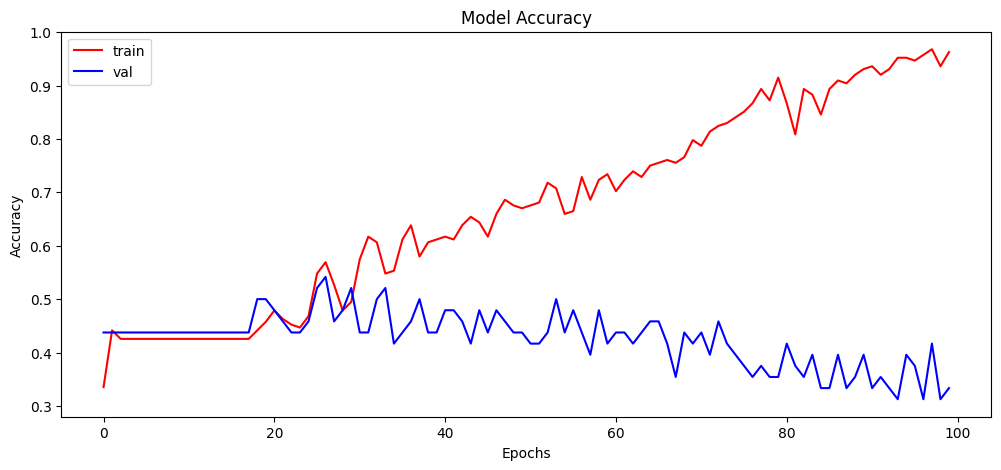

In [39]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [40]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

1/1 [==============================] - 2s 2s/step - loss: 3.8318 - accuracy: 0.5185
Accuracy over the test set: 
  51.85 %


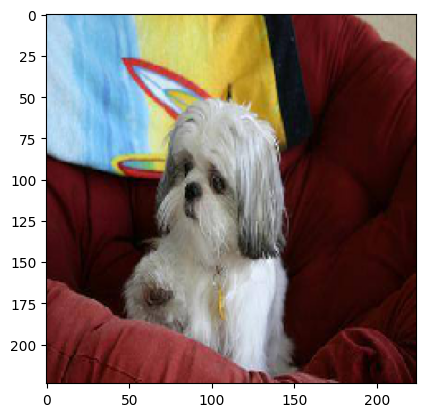

Originally :  shetland_sheepdog
Predicted :  shih-tzu


In [41]:
# Visualizando la imagen para comparar
plt.imshow(X_test[1,:,:,:])
plt.show()

# Encontrar el valor máximo de la perdición perdida y comparar el valor original con el predicho
print("Originally : ",labels['breed'][np.argmax(Y_test[1])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[1])])

Originally :  shih-tzu
Predicted :  shetland_sheepdog


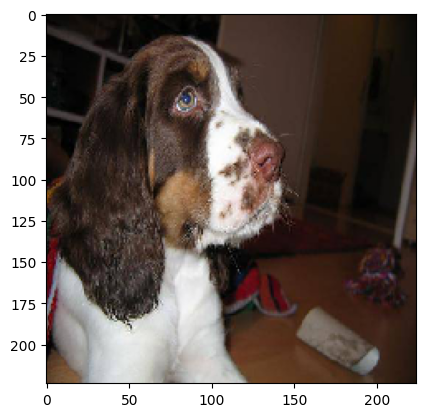

In [47]:
i = 26
print("Originally : ",labels['breed'][np.argmax(Y_test[i])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[i])])
plt.imshow(X_test[i,:,:,:])

No me gusta el resultado un Accuracy over the test set:
  51.85 % es practicamente lo mismo que tirarlo a cara y sello, la métrica `val_accuracy` nunca alcanza un valor cercano al de `accuracy` y puede ser debido a un problema de sobreajuste (overfitting). El sobreajuste ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien en datos nuevos, lo que puede resultar en una baja precisión en el conjunto de validación.

Para corregir este problema, se pueden aplicar técnicas como:

1. Aumentar el tamaño del conjunto de datos de entrenamiento: Obtener más datos puede ayudar al modelo a capturar patrones más generales y reducir el sobreajuste.

2. Utilizar técnicas de regularización: Agregar términos de regularización, como el `kernel_regularizer` utilizado en las capas convolucionales, puede limitar la complejidad del modelo y ayudar a evitar el sobreajuste.

3. Ajustar los hiperparámetros del modelo: Experimentar con diferentes valores de hiperparámetros, como el tamaño del kernel, el número de filtros y las tasas de aprendizaje, puede ayudar a encontrar una configuración que mejore el rendimiento tanto en el conjunto de entrenamiento como en el de validación.

4. Utilizar técnicas de aumento de datos: Aplicar transformaciones aleatorias a las imágenes de entrenamiento, como rotaciones, traslaciones o cambios de brillo, puede aumentar la variabilidad de los datos y mejorar la capacidad del modelo para generalizar.

Falta revisar con mayor profundidada como se puede ajustar el modelo.